In [3]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib as plt
#import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

In [4]:
trips = pd.read_csv("data/trip.csv") 

In [34]:
station = pd.read_csv("data/station.csv")

In [5]:
trips.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127


In [6]:
#Transformamos start_date,end_date: Object ->datetime64
#Transformamos zip_code: Object -> numeric
trips.start_date = pd.to_datetime(trips.start_date, errors='coerce')
trips.end_date = pd.to_datetime(trips.end_date, errors='coerce')
trips.zip_code = pd.to_numeric(trips.zip_code, errors='coerce')

In [7]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                     float64
dtype: object

In [8]:
#Seteamos un dos nuevas columnas para el data frame: only start data(os_date) y only end date(oe_date)
trips['os_date'] = trips.start_date.dt.date
trips['oe_date'] = trips.end_date.dt.date
trips.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,os_date,oe_date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127.0,2013-08-29,2013-08-29


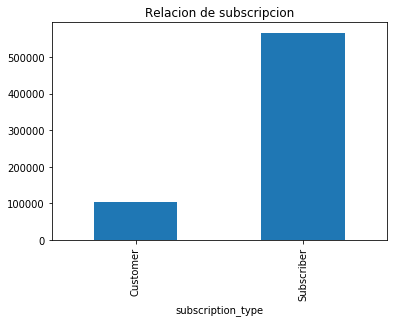

In [9]:
#Cuantas tipo de subscripciones existen?
trips.groupby('subscription_type').size()
trips.groupby('subscription_type').size().plot.bar(title="Relacion de subscripcion")
#Existen 2 tipos de subscripciones: Customer y Subscriber

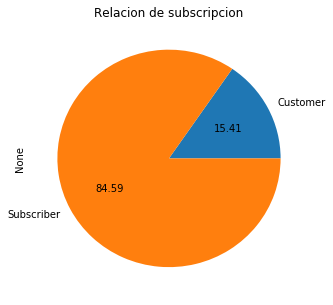

In [10]:
#Hacemos otro plot, esta vez de torta, para los tipos de subscripciones.
trips.groupby('subscription_type').size().plot(kind='pie',title="Relacion de subscripcion",figsize=(5,5),autopct='%.2f')

In [11]:
#Duracion de viajes promedio por cada tipo de subscripcion
trips.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,os_date,oe_date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127.0,2013-08-29,2013-08-29


In [16]:
#Renombro la columna duration por duration_sec
trips.rename(columns={'duration' : 'duration_sec'}, inplace=True)
trips['duration_min'] = trips.duration_sec/60
trips.head(1)

,id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,os_date,oe_date,duration_min
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127.0,2013-08-29,2013-08-29,1.05


In [17]:
#¿Quién viaja mas tiempo por estacion, los Subscriber o los Customer?
#Hacemos un plot para ver los cambios en los viajes para los distintas estaciones
#format = lambda x: "{0:.2f}".format(x)
subs = trips[trips["subscription_type"] == "Subscriber"]
cust = trips[trips["subscription_type"] == "Customer"]

In [43]:
#Antes removemos los viajes mas cortos.
print "Subscriber min: " + str(subs['duration_min'].min())
print "Subscriber max: " + str(subs['duration_min'].max())
#Miramos la media.
print "Subscriber media: "+ str(subs['duration_min'].mean())
subs_clear = subs[subs['duration_min'] > 10]
print "Subscriber media: "+ str(subs_clear['duration_min'].mean())

Subscriber min: 1.0
Subscriber max: 30876.5
Subscriber media: 9.83414760169
Subscriber media: 17.3174587148


In [44]:
#Removemos los viajes mas cortos para los Customer
print "Customer min: " + str(cust['duration_min'].min())
print "Customer max: " + str(cust['duration_min'].max())
#Miramos la media ahora
print "Customer media: "+ str(cust['duration_min'].mean())
cust_clear = cust[cust['duration_min'] > 10]
print "Customer media: "+ str(cust_clear['duration_min'].mean())

Customer min: 1.0
Customer max: 287840.0
Customer media: 65.8626888086
Customer media: 81.6356401972


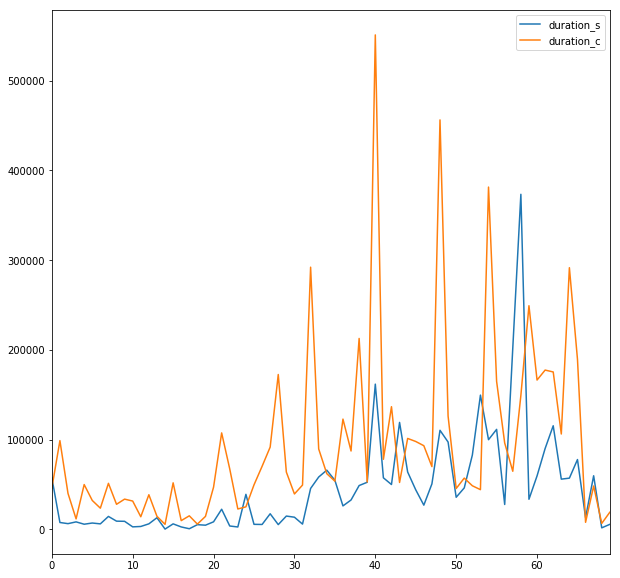

In [45]:
#Ploteamos un grafico simple
s = subs_clear[['start_station_id','duration_min']].groupby('start_station_id').aggregate(sum)
c = cust_clear[['start_station_id','duration_min']].groupby('start_station_id').aggregate(sum)
df_subs_cust = pd.DataFrame({'duration_s' : s['duration_min'],'duration_c':c['duration_min']}).reset_index()
df_subs_cust[['duration_s','duration_c']].plot(figsize=(10,10))

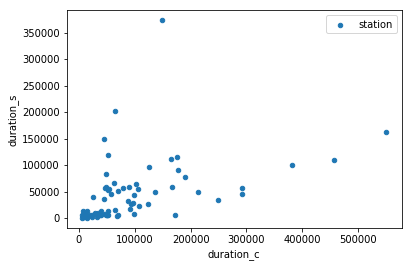

In [46]:
#Parece ser que independientemente de si un usuario es subscriptor o no, la duracion de los viajes
#estacion esta gobernada de manera diferente para cada estacion.
df_subs_cust.plot.scatter(x='duration_c',y='duration_s',label='station')

In [ ]:
#Parece ser que la duracion de los viaje totales es mas prolongada para los customer(c) que para los
#subscriber(s) en cada estacion.